In [11]:
# step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [12]:
# step 2: Load Cleaned Data
print("=" * 60)
print("LOADING CLEANED DATA")
print("=" * 60)

df = pd.read_csv('../data/processed/cleaned_data.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"\n✅ Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")
print(f"🪙 Cryptocurrencies: {', '.join(df['crypto_name'].unique())}")

LOADING CLEANED DATA

✅ Data loaded: 69,841 rows × 13 columns
📅 Date range: 2013-12-27 00:00:00 to 2022-10-23 00:00:00
🪙 Cryptocurrencies: Aave, Algorand, ApeCoin, Aptos, Avalanche, BNB, Basic Attention Token, Binance USD, Bitcoin, Bitcoin Cash, Cardano, Casper, Chain, Chainlink, Chiliz, Cosmos, Cronos, Dai, Decentraland, Dogecoin, EOS, Elrond, Ethereum, Ethereum Classic, FTX Token, Filecoin, Flow, Hedera, Huobi Token, Internet Computer, Litecoin, Maker, Monero, NEAR Protocol, OKB, Polkadot, Polygon, Quant, Ravencoin, Shiba Inu, Solana, Stellar, THORChain, TRON, Terra Classic, Tether, Tezos, The Sandbox, Theta Network, Toncoin, UNUS SED LEO, USD Coin, Uniswap, VeChain, Wrapped Bitcoin, XRP



FEATURE 1: LOG RETURNS

📚 Theory:
Log returns are preferred in finance because:
  • Time-additive: log(P3/P1) = log(P2/P1) + log(P3/P2)
  • Symmetric: +10% and -10% are equidistant from 0
  • Approximately normally distributed

Formula: log_return = ln(Price_t / Price_t-1)

✅ Log returns created
  Mean: 0.000977
  Std: 0.078906
  Min: -8.516598
  Max: 1.516382


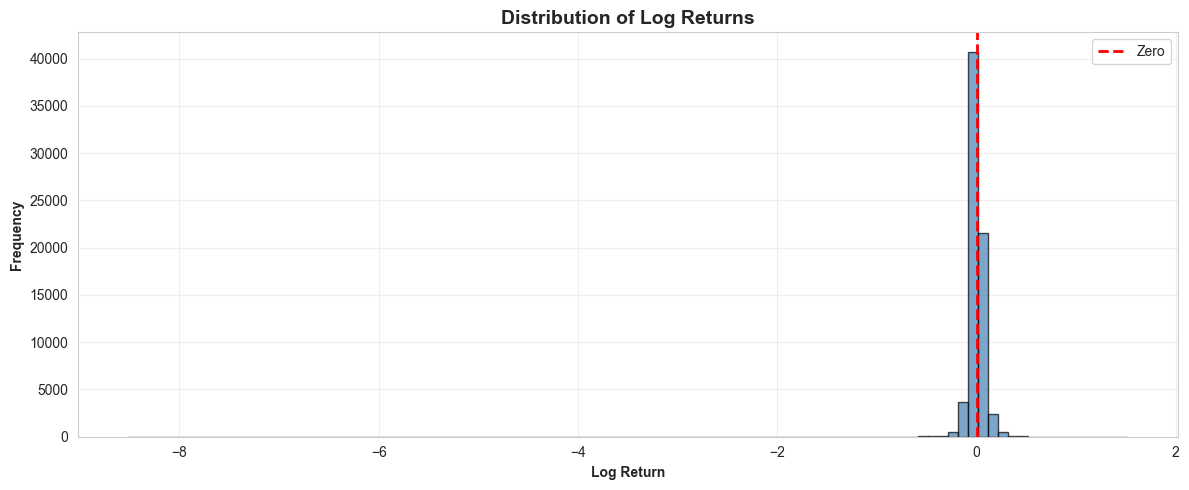

In [13]:
# step 3: Feature 1 - Log Returns
print("\n" + "=" * 60)
print("FEATURE 1: LOG RETURNS")
print("=" * 60)

print("\n📚 Theory:")
print("Log returns are preferred in finance because:")
print("  • Time-additive: log(P3/P1) = log(P2/P1) + log(P3/P2)")
print("  • Symmetric: +10% and -10% are equidistant from 0")
print("  • Approximately normally distributed")
print("\nFormula: log_return = ln(Price_t / Price_t-1)")

# Calculate log returns
df['log_return'] = df.groupby('crypto_name')['close'].transform(
    lambda x: np.log(x / x.shift(1))
)

print(f"\n✅ Log returns created")
print(f"  Mean: {df['log_return'].mean():.6f}")
print(f"  Std: {df['log_return'].std():.6f}")
print(f"  Min: {df['log_return'].min():.6f}")
print(f"  Max: {df['log_return'].max():.6f}")

# Visualize
plt.figure(figsize=(12, 5))
plt.hist(df['log_return'].dropna(), bins=100, color='steelblue', 
         edgecolor='black', alpha=0.7)
plt.xlabel('Log Return', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Log Returns', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


FEATURES 2 & 3: ROLLING VOLATILITY

📚 Theory:
Volatility = Standard deviation of log returns over a window
  • Measures market uncertainty and risk
  • Higher volatility = higher risk

Formula: volatility = std(log_returns) over window

✅ Volatility features created:

  7-Day Volatility (TARGET):
    Mean: 0.055338
    Std: 0.053288

  14-Day Volatility (FEATURE):
    Mean: 0.057681
    Std: 0.050982


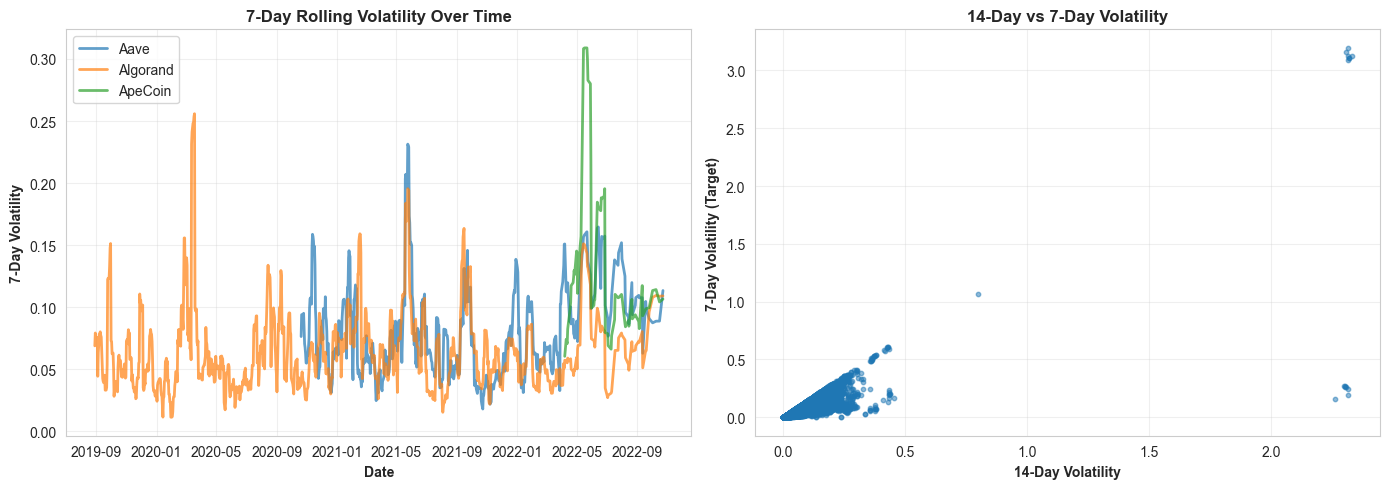

In [14]:
# step 4: Feature 2 & 3 - Rolling Volatility
print("\n" + "=" * 60)
print("FEATURES 2 & 3: ROLLING VOLATILITY")
print("=" * 60)

print("\n📚 Theory:")
print("Volatility = Standard deviation of log returns over a window")
print("  • Measures market uncertainty and risk")
print("  • Higher volatility = higher risk")
print("\nFormula: volatility = std(log_returns) over window")

# 7-day volatility (TARGET VARIABLE)
df['volatility_7d'] = df.groupby('crypto_name')['log_return'].transform(
    lambda x: x.rolling(window=7).std()
)

# 14-day volatility (FEATURE)
df['volatility_14d'] = df.groupby('crypto_name')['log_return'].transform(
    lambda x: x.rolling(window=14).std()
)

print(f"\n✅ Volatility features created:")
print(f"\n  7-Day Volatility (TARGET):")
print(f"    Mean: {df['volatility_7d'].mean():.6f}")
print(f"    Std: {df['volatility_7d'].std():.6f}")
print(f"\n  14-Day Volatility (FEATURE):")
print(f"    Mean: {df['volatility_14d'].mean():.6f}")
print(f"    Std: {df['volatility_14d'].std():.6f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for crypto in df['crypto_name'].unique()[:3]:  # Plot first 3 cryptos
    crypto_df = df[df['crypto_name'] == crypto].dropna()
    axes[0].plot(crypto_df['date'], crypto_df['volatility_7d'], 
                 label=crypto, linewidth=2, alpha=0.7)

axes[0].set_xlabel('Date', fontweight='bold')
axes[0].set_ylabel('7-Day Volatility', fontweight='bold')
axes[0].set_title('7-Day Rolling Volatility Over Time', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot: 14d vs 7d volatility
df_clean = df.dropna(subset=['volatility_7d', 'volatility_14d'])
axes[1].scatter(df_clean['volatility_14d'], df_clean['volatility_7d'], 
                alpha=0.5, s=10)
axes[1].set_xlabel('14-Day Volatility', fontweight='bold')
axes[1].set_ylabel('7-Day Volatility (Target)', fontweight='bold')
axes[1].set_title('14-Day vs 7-Day Volatility', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


FEATURES 4-6: MOVING AVERAGES

📚 Theory:
Moving Average = Average price over a window
  • Smooths out short-term fluctuations
  • Identifies trends and support/resistance levels
  • MA crossovers signal trend changes

Formula: MA_n = mean(prices over n days)
✅ MA-7 created
✅ MA-14 created
✅ MA-30 created


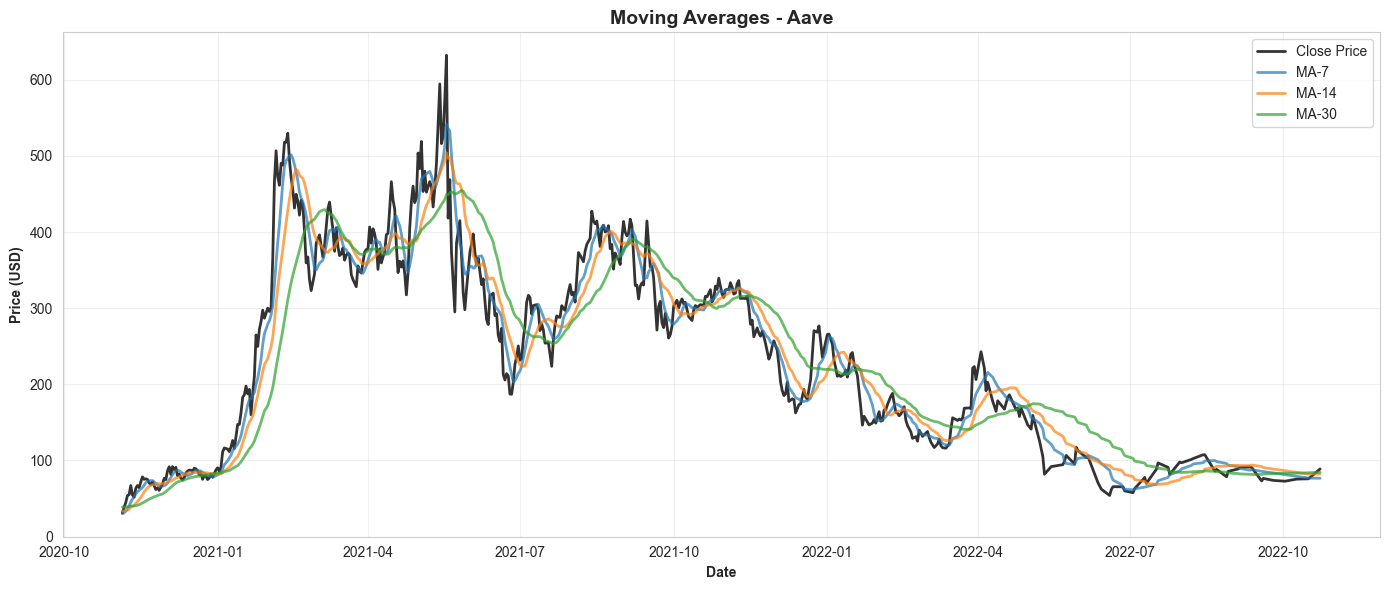

In [15]:
# step 5: Features 4-6 - Moving Averages
print("\n" + "=" * 60)
print("FEATURES 4-6: MOVING AVERAGES")
print("=" * 60)

print("\n📚 Theory:")
print("Moving Average = Average price over a window")
print("  • Smooths out short-term fluctuations")
print("  • Identifies trends and support/resistance levels")
print("  • MA crossovers signal trend changes")
print("\nFormula: MA_n = mean(prices over n days)")

# Create moving averages
for window in [7, 14, 30]:
    df[f'ma_{window}'] = df.groupby('crypto_name')['close'].transform(
        lambda x: x.rolling(window=window).mean()
    )
    print(f"✅ MA-{window} created")

# Visualize
plt.figure(figsize=(14, 6))

# Select one cryptocurrency for visualization
sample_crypto = df['crypto_name'].unique()[0]
crypto_df = df[df['crypto_name'] == sample_crypto].dropna()

plt.plot(crypto_df['date'], crypto_df['close'], 
         label='Close Price', linewidth=2, alpha=0.8, color='black')
plt.plot(crypto_df['date'], crypto_df['ma_7'], 
         label='MA-7', linewidth=2, alpha=0.7)
plt.plot(crypto_df['date'], crypto_df['ma_14'], 
         label='MA-14', linewidth=2, alpha=0.7)
plt.plot(crypto_df['date'], crypto_df['ma_30'], 
         label='MA-30', linewidth=2, alpha=0.7)

plt.xlabel('Date', fontweight='bold')
plt.ylabel('Price (USD)', fontweight='bold')
plt.title(f'Moving Averages - {sample_crypto}', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


FEATURE 7: BOLLINGER BAND WIDTH

📚 Theory:
Bollinger Bands measure market volatility:
  • Middle Band = 20-day SMA
  • Upper Band = Middle + (2 × std)
  • Lower Band = Middle - (2 × std)
  • BB Width = (Upper - Lower) / Middle

Wider bands = Higher volatility

✅ Bollinger Band width created
  Mean: 0.412719
  Std: 0.380267


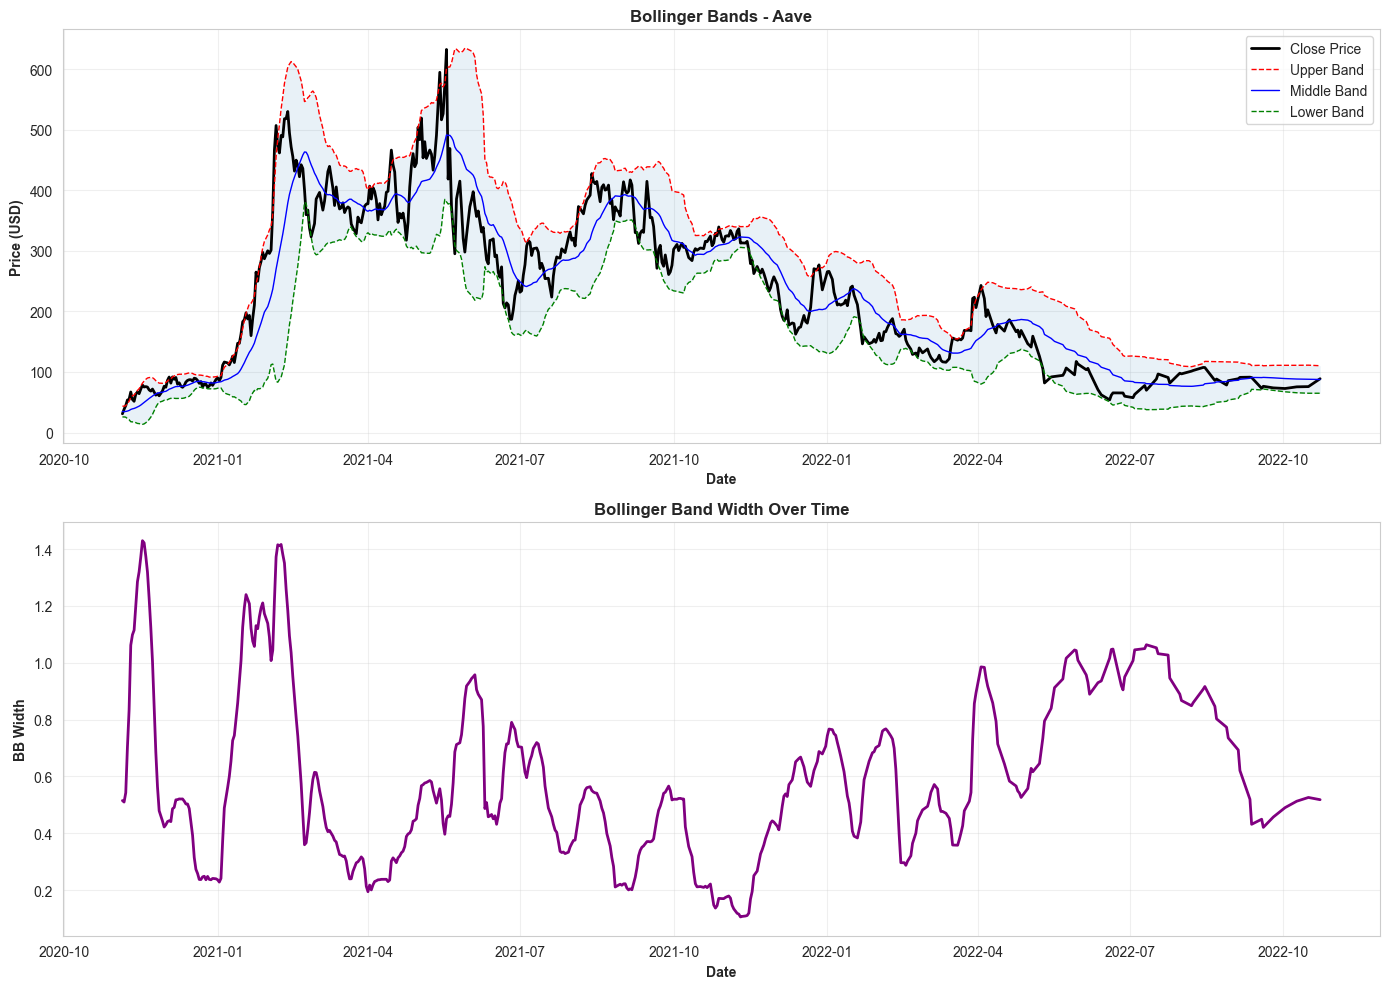

In [16]:
# step 6: Feature 7 - Bollinger Band Width
print("\n" + "=" * 60)
print("FEATURE 7: BOLLINGER BAND WIDTH")
print("=" * 60)

print("\n📚 Theory:")
print("Bollinger Bands measure market volatility:")
print("  • Middle Band = 20-day SMA")
print("  • Upper Band = Middle + (2 × std)")
print("  • Lower Band = Middle - (2 × std)")
print("  • BB Width = (Upper - Lower) / Middle")
print("\nWider bands = Higher volatility")

# Calculate Bollinger Bands
df['bb_middle'] = df.groupby('crypto_name')['close'].transform(
    lambda x: x.rolling(window=20).mean()
)

df['bb_std'] = df.groupby('crypto_name')['close'].transform(
    lambda x: x.rolling(window=20).std()
)

df['bb_upper'] = df['bb_middle'] + (2 * df['bb_std'])
df['bb_lower'] = df['bb_middle'] - (2 * df['bb_std'])
df['bb_width'] = (df['bb_upper'] - df['bb_lower']) / df['bb_middle']

print(f"\n✅ Bollinger Band width created")
print(f"  Mean: {df['bb_width'].mean():.6f}")
print(f"  Std: {df['bb_width'].std():.6f}")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

crypto_df = df[df['crypto_name'] == sample_crypto].dropna()

# Bollinger Bands
axes[0].plot(crypto_df['date'], crypto_df['close'], 
             label='Close Price', color='black', linewidth=2)
axes[0].plot(crypto_df['date'], crypto_df['bb_upper'], 
             label='Upper Band', color='red', linewidth=1, linestyle='--')
axes[0].plot(crypto_df['date'], crypto_df['bb_middle'], 
             label='Middle Band', color='blue', linewidth=1)
axes[0].plot(crypto_df['date'], crypto_df['bb_lower'], 
             label='Lower Band', color='green', linewidth=1, linestyle='--')
axes[0].fill_between(crypto_df['date'], crypto_df['bb_upper'], 
                      crypto_df['bb_lower'], alpha=0.1)
axes[0].set_xlabel('Date', fontweight='bold')
axes[0].set_ylabel('Price (USD)', fontweight='bold')
axes[0].set_title(f'Bollinger Bands - {sample_crypto}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# BB Width
axes[1].plot(crypto_df['date'], crypto_df['bb_width'], 
             color='purple', linewidth=2)
axes[1].set_xlabel('Date', fontweight='bold')
axes[1].set_ylabel('BB Width', fontweight='bold')
axes[1].set_title('Bollinger Band Width Over Time', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Drop intermediate columns
df.drop(['bb_middle', 'bb_std', 'bb_upper', 'bb_lower'], axis=1, inplace=True)


FEATURE 8: AVERAGE TRUE RANGE (ATR)

📚 Theory:
ATR measures market volatility:
  • True Range = max of:
    1. High - Low
    2. |High - Previous Close|
    3. |Low - Previous Close|
  • ATR = 14-day average of True Range

Higher ATR = More volatile market

✅ ATR created
  Mean: 55.73
  Std: 363.83


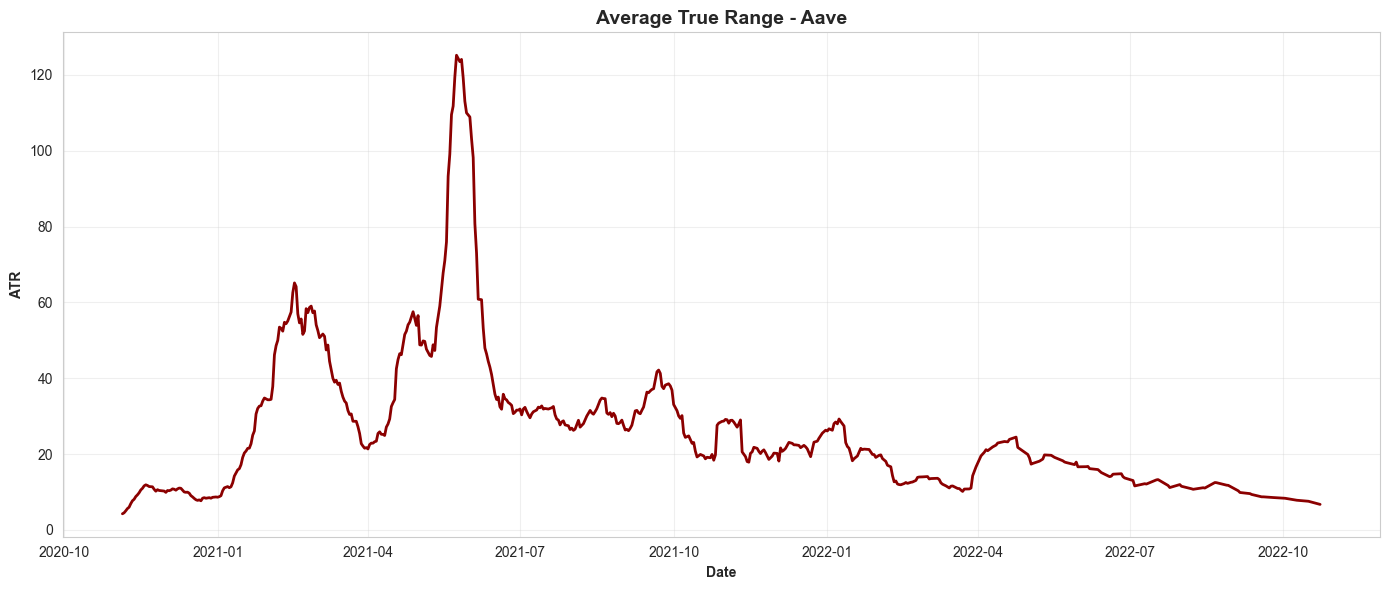

In [17]:
# step 7: Feature 8 - Average True Range (ATR)
print("\n" + "=" * 60)
print("FEATURE 8: AVERAGE TRUE RANGE (ATR)")
print("=" * 60)

print("\n📚 Theory:")
print("ATR measures market volatility:")
print("  • True Range = max of:")
print("    1. High - Low")
print("    2. |High - Previous Close|")
print("    3. |Low - Previous Close|")
print("  • ATR = 14-day average of True Range")
print("\nHigher ATR = More volatile market")

# Calculate ATR components
df['high_low'] = df['high'] - df['low']
df['high_close'] = np.abs(df['high'] - df.groupby('crypto_name')['close'].shift(1))
df['low_close'] = np.abs(df['low'] - df.groupby('crypto_name')['close'].shift(1))

# True Range
df['true_range'] = df[['high_low', 'high_close', 'low_close']].max(axis=1)

# ATR (14-day average)
df['atr'] = df.groupby('crypto_name')['true_range'].transform(
    lambda x: x.rolling(window=14).mean()
)

print(f"\n✅ ATR created")
print(f"  Mean: {df['atr'].mean():.2f}")
print(f"  Std: {df['atr'].std():.2f}")

# Visualize
plt.figure(figsize=(14, 6))
crypto_df = df[df['crypto_name'] == sample_crypto].dropna()
plt.plot(crypto_df['date'], crypto_df['atr'], color='darkred', linewidth=2)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('ATR', fontweight='bold')
plt.title(f'Average True Range - {sample_crypto}', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Drop intermediate columns
df.drop(['high_low', 'high_close', 'low_close', 'true_range'], axis=1, inplace=True)


FEATURE 9: LIQUIDITY RATIO

📚 Theory:
Liquidity Ratio = Trading Volume / Market Cap
  • Measures trading activity relative to market size
  • Higher ratio = More liquid market
  • Important for risk assessment

✅ Liquidity ratio created
  Mean: 0.255035
  Std: 0.712540


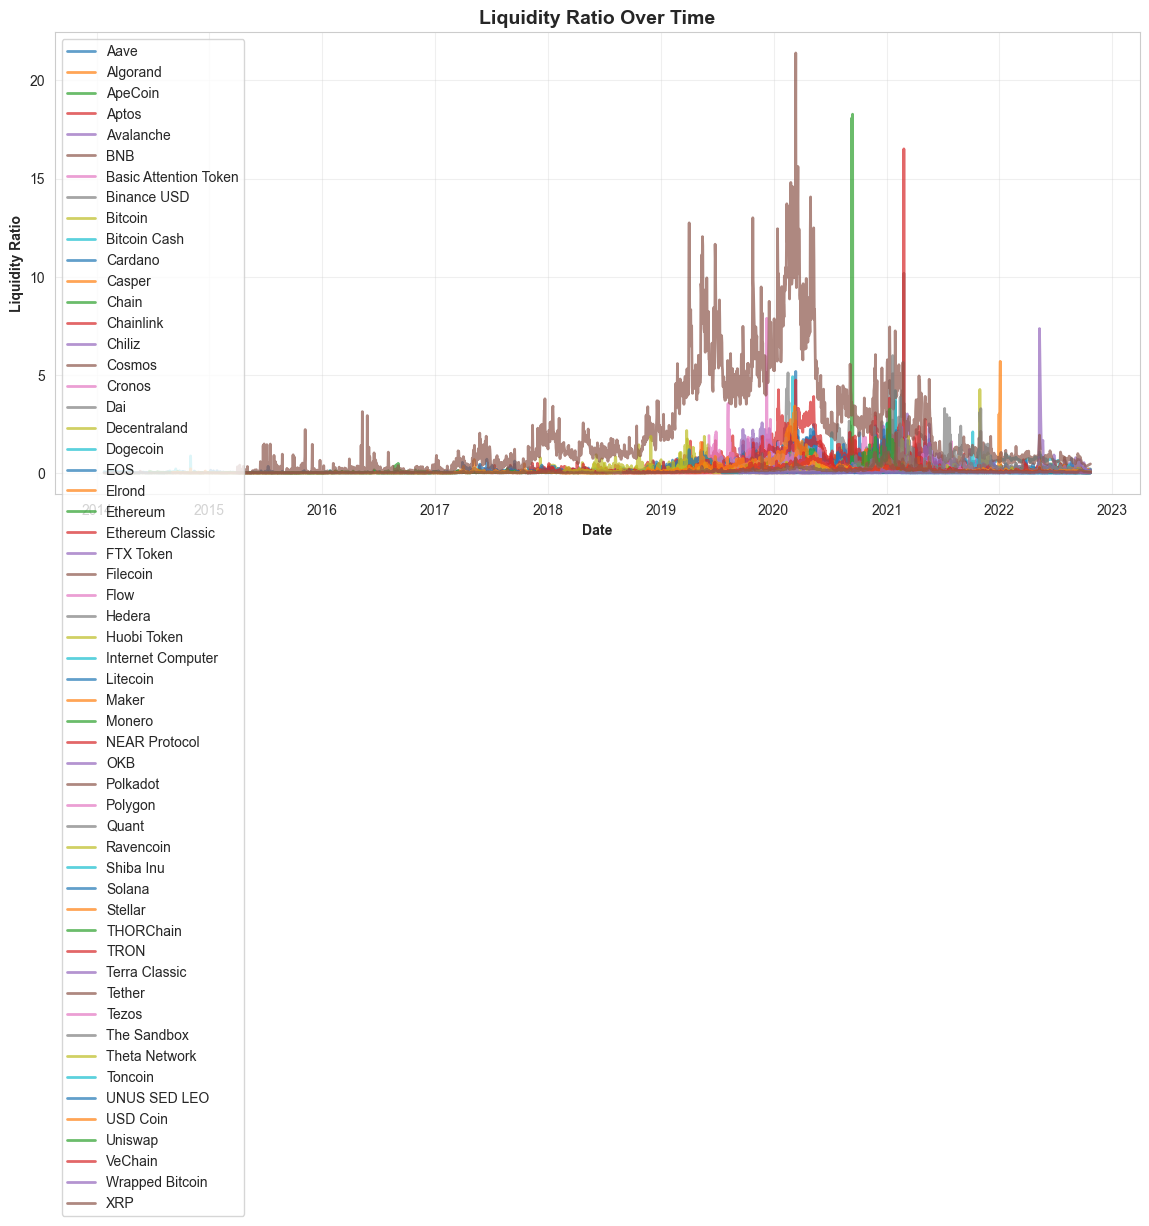

In [18]:
# step 8: Feature 9 - Liquidity Ratio
print("\n" + "=" * 60)
print("FEATURE 9: LIQUIDITY RATIO")
print("=" * 60)

print("\n📚 Theory:")
print("Liquidity Ratio = Trading Volume / Market Cap")
print("  • Measures trading activity relative to market size")
print("  • Higher ratio = More liquid market")
print("  • Important for risk assessment")

df['liquidity_ratio'] = df['volume'] / (df['marketCap'] + 1)

print(f"\n✅ Liquidity ratio created")
print(f"  Mean: {df['liquidity_ratio'].mean():.6f}")
print(f"  Std: {df['liquidity_ratio'].std():.6f}")

# Visualize
plt.figure(figsize=(14, 6))
for crypto in df['crypto_name'].unique():
    crypto_df = df[df['crypto_name'] == crypto].dropna()
    plt.plot(crypto_df['date'], crypto_df['liquidity_ratio'], 
             label=crypto, linewidth=2, alpha=0.7)

plt.xlabel('Date', fontweight='bold')
plt.ylabel('Liquidity Ratio', fontweight='bold')
plt.title('Liquidity Ratio Over Time', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


FEATURE 10: MOMENTUM

📚 Theory:
Momentum = Current Price / Price N days ago
  • Measures rate of price change
  • > 1: Upward momentum
  • < 1: Downward momentum
  • = 1: No momentum

✅ 7-day momentum created
  Mean: 1.0288
  Std: 0.2542


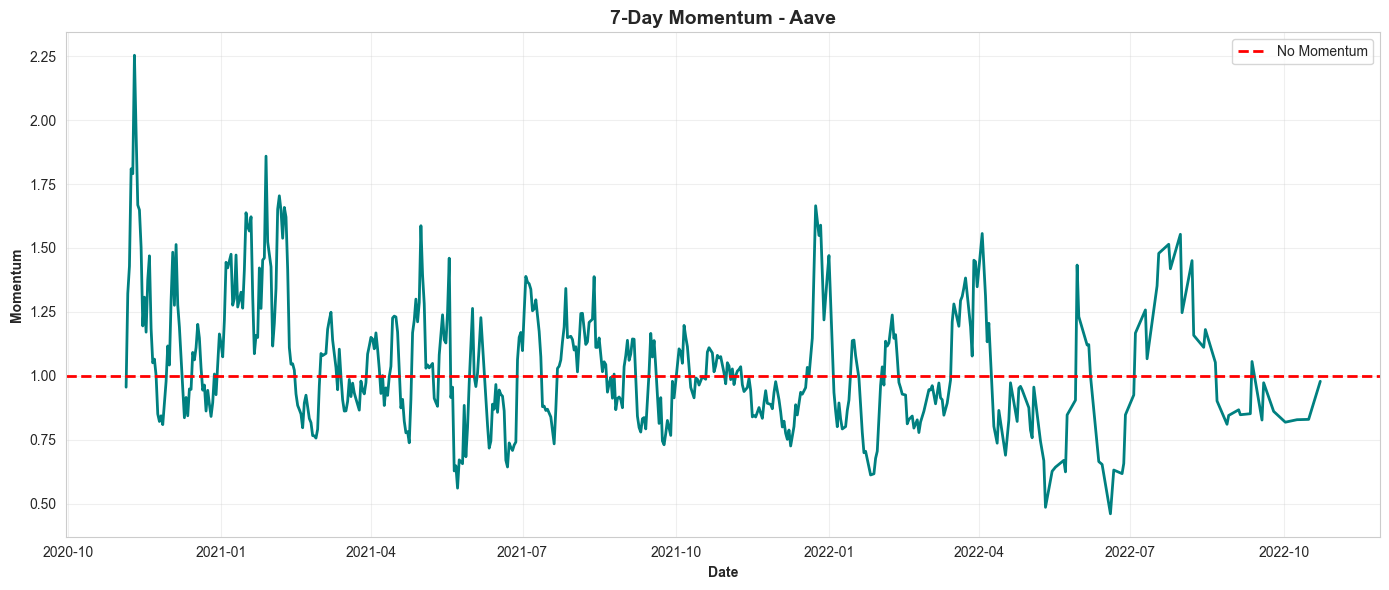

In [19]:
# step 9: Feature 10 - Momentum
print("\n" + "=" * 60)
print("FEATURE 10: MOMENTUM")
print("=" * 60)

print("\n📚 Theory:")
print("Momentum = Current Price / Price N days ago")
print("  • Measures rate of price change")
print("  • > 1: Upward momentum")
print("  • < 1: Downward momentum")
print("  • = 1: No momentum")

df['momentum_7'] = df.groupby('crypto_name')['close'].transform(
    lambda x: x / x.shift(7)
)

print(f"\n✅ 7-day momentum created")
print(f"  Mean: {df['momentum_7'].mean():.4f}")
print(f"  Std: {df['momentum_7'].std():.4f}")

# Visualize
plt.figure(figsize=(14, 6))
crypto_df = df[df['crypto_name'] == sample_crypto].dropna()
plt.plot(crypto_df['date'], crypto_df['momentum_7'], 
         color='teal', linewidth=2)
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='No Momentum')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Momentum', fontweight='bold')
plt.title(f'7-Day Momentum - {sample_crypto}', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# step 10: Feature Summary
print("\n" + "=" * 60)
print("FEATURE SUMMARY")
print("=" * 60)

feature_list = [
    'log_return', 'volatility_7d', 'volatility_14d',
    'ma_7', 'ma_14', 'ma_30', 'bb_width', 'atr',
    'liquidity_ratio', 'momentum_7'
]

print(f"\n✅ Total features created: {len(feature_list)}")
print("\nFeature List:")
for i, feat in enumerate(feature_list, 1):
    print(f"  {i:2d}. {feat}")

print("\n📊 Feature Statistics:")
display(df[feature_list].describe())


FEATURE SUMMARY

✅ Total features created: 10

Feature List:
   1. log_return
   2. volatility_7d
   3. volatility_14d
   4. ma_7
   5. ma_14
   6. ma_30
   7. bb_width
   8. atr
   9. liquidity_ratio
  10. momentum_7

📊 Feature Statistics:


,log_return,volatility_7d,volatility_14d,ma_7,ma_14,ma_30,bb_width,atr,liquidity_ratio,momentum_7
count,69785.000000,69455.000000,69070.000000,69510.000000,69125.000000,68245.000000,68795.000000,69125.000000,6.984100e+04,69455.000000
mean,0.000977,0.055338,0.057681,890.312066,892.400633,896.917978,0.412719,55.730060,2.550347e-01,1.028829
std,0.078906,0.053288,0.050982,5339.264909,5343.554184,5351.868424,0.380267,363.825908,7.125399e-01,0.254196
min,-8.516598,0.000000,0.000000,0.000006,0.000006,0.000007,0.000000,0.000000,4.391755e-07,0.000002
25%,-0.025944,0.027795,0.032714,0.161284,0.163012,0.165435,0.194080,0.007745,2.798746e-02,0.924950
50%,0.000000,0.046570,0.050675,1.454933,1.465426,1.482959,0.330316,0.119862,7.765618e-02,0.999999
75%,0.026371,0.071747,0.073594,27.961979,28.135829,28.511801,0.526503,2.515879,2.118404e-01,1.083506
max,1.516382,3.195219,2.328253,65425.441580,63757.951663,62470.502033,17.852397,11736.779425,2.140119e+01,9.088124



FEATURE CORRELATION ANALYSIS


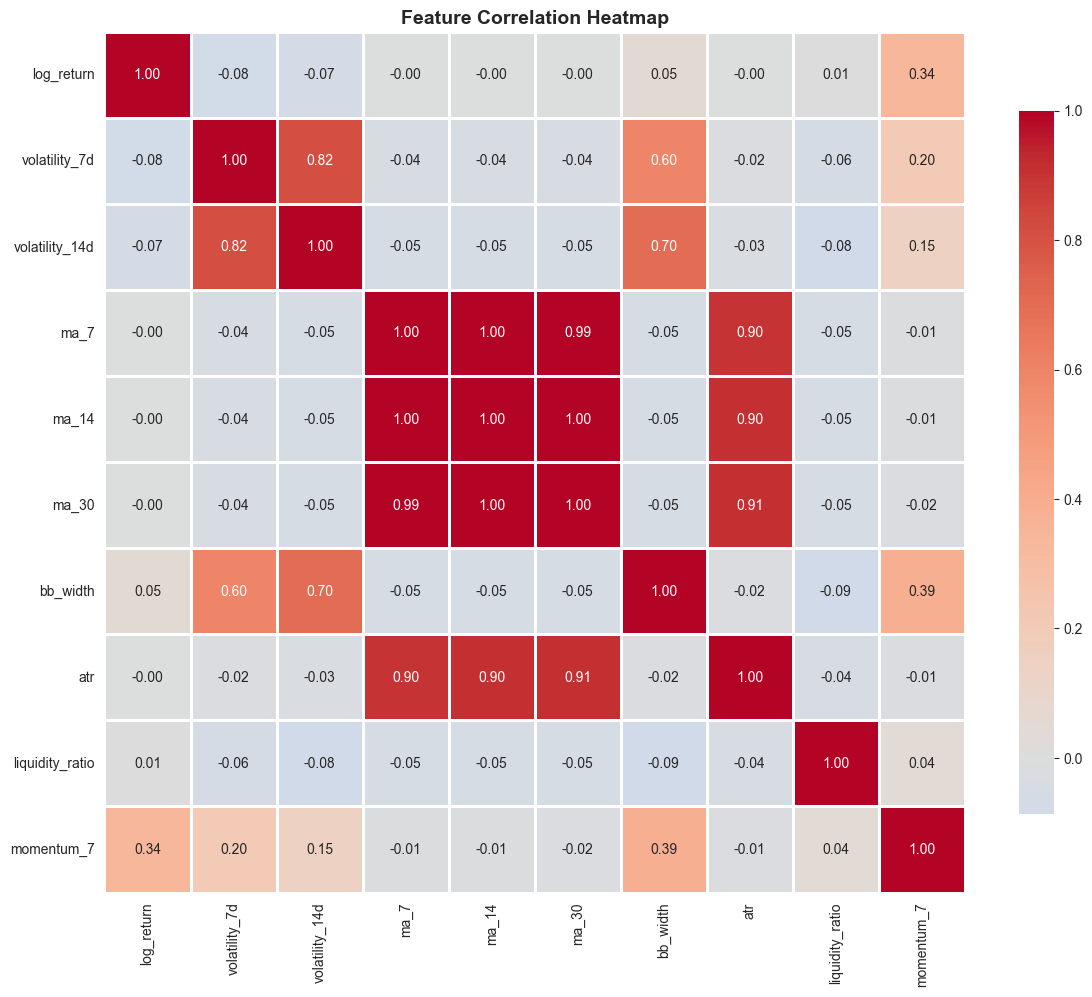


🔍 Key Correlations with Target (volatility_7d):
volatility_7d      1.000000
volatility_14d     0.816702
bb_width           0.597520
momentum_7         0.204823
atr               -0.020251
ma_30             -0.040173
ma_14             -0.042040
ma_7              -0.043190
liquidity_ratio   -0.060018
log_return        -0.079217
Name: volatility_7d, dtype: float64


In [21]:
# step 11: Feature Correlation
print("\n" + "=" * 60)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlations
corr_matrix = df[feature_list].corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\n🔍 Key Correlations with Target (volatility_7d):")
target_corr = corr_matrix['volatility_7d'].sort_values(ascending=False)
print(target_corr)


In [22]:
# step 12: Remove NaN and Save
print("\n" + "=" * 60)
print("FINAL DATA PREPARATION")
print("=" * 60)

print(f"\n📊 Before removing NaN:")
print(f"  Rows: {len(df):,}")
print(f"  NaN count: {df.isnull().sum().sum():,}")

# Remove NaN created by rolling windows
df_clean = df.dropna()

print(f"\n📊 After removing NaN:")
print(f"  Rows: {len(df_clean):,}")
print(f"  NaN count: {df_clean.isnull().sum().sum()}")
print(f"  Rows removed: {len(df) - len(df_clean):,}")

# Save to CSV
df_clean.to_csv('../data/processed/features.csv', index=False)
print(f"\n✅ Feature-engineered data saved to: data/processed/features.csv")



FINAL DATA PREPARATION

📊 Before removing NaN:
  Rows: 69,841
  NaN count: 6,004

📊 After removing NaN:
  Rows: 68,245
  NaN count: 0
  Rows removed: 1,596

✅ Feature-engineered data saved to: data/processed/features.csv


In [23]:
# step 13: Feature Engineering Report
print("\n" + "=" * 60)
print("GENERATING FEATURE ENGINEERING REPORT")
print("=" * 60)

report = f"""
# Feature Engineering Report
## Cryptocurrency Volatility Prediction

Generated: {pd.Timestamp.now()}

## Features Created: {len(feature_list)}

### 1. Log Returns
- Formula: ln(Price_t / Price_t-1)
- Purpose: Calculate returns for volatility
- Mean: {df_clean['log_return'].mean():.6f}

### 2. Volatility (7-day) - TARGET VARIABLE
- Formula: std(log_returns over 7 days)
- Purpose: Target variable for prediction
- Mean: {df_clean['volatility_7d'].mean():.6f}

### 3. Volatility (14-day)
- Formula: std(log_returns over 14 days)
- Purpose: Medium-term volatility feature
- Mean: {df_clean['volatility_14d'].mean():.6f}

### 4-6. Moving Averages (7, 14, 30-day)
- Formula: mean(prices over window)
- Purpose: Capture price trends
- Correlation with target: MA7 = {corr_matrix.loc['ma_7', 'volatility_7d']:.3f}

### 7. Bollinger Band Width
- Formula: (Upper - Lower) / Middle
- Purpose: Measure volatility
- Correlation with target: {corr_matrix.loc['bb_width', 'volatility_7d']:.3f}

### 8. Average True Range (ATR)
- Formula: 14-day average of true range
- Purpose: Volatility indicator
- Correlation with target: {corr_matrix.loc['atr', 'volatility_7d']:.3f}

### 9. Liquidity Ratio
- Formula: Volume / Market Cap
- Purpose: Trading activity measure
- Correlation with target: {corr_matrix.loc['liquidity_ratio', 'volatility_7d']:.3f}

### 10. Momentum (7-day)
- Formula: Price_t / Price_t-7
- Purpose: Price momentum indicator
- Correlation with target: {corr_matrix.loc['momentum_7', 'volatility_7d']:.3f}

## Data Quality
- Initial rows: {len(df):,}
- Final rows: {len(df_clean):,}
- Rows removed (NaN): {len(df) - len(df_clean):,}
- Final columns: {len(df_clean.columns)}

## Next Steps
1. Model training with Random Forest
2. Hyperparameter optimization
3. Model evaluation
4. Deployment
"""

with open('../reports/Feature_Engineering_Report.md', 'w') as f:
    f.write(report)

print("✅ Feature Engineering Report saved to: reports/Feature_Engineering_Report.md")

print("\n" + "=" * 60)
print("FEATURE ENGINEERING COMPLETE!")
print("=" * 60)
print(f"\n✅ Created {len(feature_list)} features")
print(f"✅ Final dataset: {len(df_clean):,} rows")
print(f"✅ Ready for model training!")


GENERATING FEATURE ENGINEERING REPORT
✅ Feature Engineering Report saved to: reports/Feature_Engineering_Report.md

FEATURE ENGINEERING COMPLETE!

✅ Created 10 features
✅ Final dataset: 68,245 rows
✅ Ready for model training!
